In [1]:
import pandas as pd
import numpy as np
from tensorflow import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline
X = pd.read_csv(r'C:\Data\DeepLearningWorkshop\HCV_feats.csv')
y = pd.read_csv(r'C:\Data\DeepLearningWorkshop\HCV_target.csv')

Using TensorFlow backend.


In [2]:
print("Number of Examples in the Dataset = ", X.shape[0])
print("Number of Features for each example = ", X.shape[1]) 
print("Possible Output Classes = ", \
      y['AdvancedFibrosis'].unique())

Number of Examples in the Dataset =  1385
Number of Features for each example =  28
Possible Output Classes =  [0 1]


In [3]:
seed = 1
np.random.seed(seed)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=seed)
# Print the information regarding dataset sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print ("Number of examples in training set = ", X_train.shape[0])
print ("Number of examples in test set = ", X_test.shape[0])

(1108, 28)
(1108, 1)
(277, 28)
(277, 1)
Number of examples in training set =  1108
Number of examples in test set =  277


In [4]:
np.random.seed(seed)
random.set_seed(seed)
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 3, activation = 'tanh', \
                     input_dim=X_train.shape[1]))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', \
                   loss = 'binary_crossentropy', \
                   metrics = ['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 87        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=classifier.fit(X_train, y_train, batch_size = 20, \
                       epochs = 100, validation_split=0.1, \
                       shuffle=False)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 98us/step - loss: 0.7972 - accuracy: 0.4714 - val_loss: 0.7460 - val_accuracy: 0.5676
Epoch 2/100
997/997 [==============================] - 0s 33us/step - loss: 0.7795 - accuracy: 0.4764 - val_loss: 0.7343 - val_accuracy: 0.5676
Epoch 3/100
997/997 [==============================] - 0s 31us/step - loss: 0.7653 - accuracy: 0.4794 - val_loss: 0.7248 - val_accuracy: 0.5676
Epoch 4/100
997/997 [==============================] - 0s 30us/step - loss: 0.7536 - accuracy: 0.4875 - val_loss: 0.7169 - val_accuracy: 0.5766
Epoch 5/100
997/997 [==============================] - 0s 33us/step - loss: 0.7441 - accuracy: 0.4945 - val_loss: 0.7104 - val_accuracy: 0.5766
Epoch 6/100
997/997 [==============================] - 0s 32us/step - loss: 0.7363 - accuracy: 0.5035 - val_loss: 0.7050 - val_accuracy: 0.5676
Epoch 7/100
997/997 [==============================] - 0s 30us/step - loss: 0.7297 - accur

Epoch 57/100
997/997 [==============================] - 0s 31us/step - loss: 0.6850 - accuracy: 0.5637 - val_loss: 0.6729 - val_accuracy: 0.5946
Epoch 58/100
997/997 [==============================] - 0s 31us/step - loss: 0.6849 - accuracy: 0.5607 - val_loss: 0.6729 - val_accuracy: 0.5946
Epoch 59/100
997/997 [==============================] - 0s 31us/step - loss: 0.6847 - accuracy: 0.5627 - val_loss: 0.6728 - val_accuracy: 0.5946
Epoch 60/100
997/997 [==============================] - 0s 32us/step - loss: 0.6845 - accuracy: 0.5607 - val_loss: 0.6728 - val_accuracy: 0.5946
Epoch 61/100
997/997 [==============================] - 0s 31us/step - loss: 0.6844 - accuracy: 0.5597 - val_loss: 0.6728 - val_accuracy: 0.5946
Epoch 62/100
997/997 [==============================] - 0s 31us/step - loss: 0.6842 - accuracy: 0.5607 - val_loss: 0.6727 - val_accuracy: 0.5946
Epoch 63/100
997/997 [==============================] - 0s 32us/step - loss: 0.6840 - accuracy: 0.5617 - val_loss: 0.6727 - val_ac

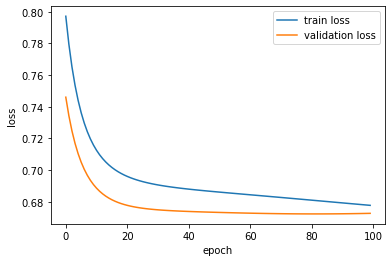

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [7]:
print(f"Best Accuracy on training set = \
{max(history.history['accuracy'])*100:.3f}%")
print(f"Best Accuracy on validation set = \
{max(history.history['val_accuracy'])*100:.3f}%") 
test_loss, test_acc = \
classifier.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and \
the accuracy is {test_acc*100:.3f}%')

Best Accuracy on training set = 57.472%
Best Accuracy on validation set = 61.261%
277/277 [==============================] - 0s 25us/step
The loss on the test set is 0.7101 and the accuracy is 49.458%


In [8]:
np.random.seed(seed)
random.set_seed(seed)
# define the keras model
classifier = Sequential()
classifier.add(Dense(units = 4, activation = 'tanh', \
                     input_dim = X_train.shape[1]))
classifier.add(Dense(units = 2, activation = 'tanh'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'sgd', \
                   loss = 'binary_crossentropy', \
                   metrics = ['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 116       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [9]:
history=classifier.fit(X_train, y_train, batch_size = 20, \
                       epochs = 100, validation_split=0.1, \
                       shuffle=False)

Train on 997 samples, validate on 111 samples
Epoch 1/100
997/997 [==============================] - 0s 100us/step - loss: 0.7468 - accuracy: 0.4945 - val_loss: 0.7153 - val_accuracy: 0.5676
Epoch 2/100
997/997 [==============================] - 0s 30us/step - loss: 0.7376 - accuracy: 0.4935 - val_loss: 0.7101 - val_accuracy: 0.5586
Epoch 3/100
997/997 [==============================] - 0s 31us/step - loss: 0.7302 - accuracy: 0.4945 - val_loss: 0.7060 - val_accuracy: 0.5586
Epoch 4/100
997/997 [==============================] - 0s 38us/step - loss: 0.7243 - accuracy: 0.5035 - val_loss: 0.7028 - val_accuracy: 0.5586
Epoch 5/100
997/997 [==============================] - 0s 32us/step - loss: 0.7195 - accuracy: 0.5035 - val_loss: 0.7002 - val_accuracy: 0.5586
Epoch 6/100
997/997 [==============================] - 0s 41us/step - loss: 0.7155 - accuracy: 0.5015 - val_loss: 0.6981 - val_accuracy: 0.5405
Epoch 7/100
997/997 [==============================] - 0s 36us/step - loss: 0.7123 - accu

997/997 [==============================] - 0s 39us/step - loss: 0.6917 - accuracy: 0.5306 - val_loss: 0.6894 - val_accuracy: 0.5315
Epoch 58/100
997/997 [==============================] - 0s 37us/step - loss: 0.6916 - accuracy: 0.5296 - val_loss: 0.6894 - val_accuracy: 0.5225
Epoch 59/100
997/997 [==============================] - 0s 37us/step - loss: 0.6915 - accuracy: 0.5306 - val_loss: 0.6894 - val_accuracy: 0.5135
Epoch 60/100
997/997 [==============================] - 0s 35us/step - loss: 0.6915 - accuracy: 0.5316 - val_loss: 0.6894 - val_accuracy: 0.5135
Epoch 61/100
997/997 [==============================] - 0s 33us/step - loss: 0.6914 - accuracy: 0.5316 - val_loss: 0.6894 - val_accuracy: 0.5135
Epoch 62/100
997/997 [==============================] - 0s 30us/step - loss: 0.6914 - accuracy: 0.5336 - val_loss: 0.6893 - val_accuracy: 0.5135
Epoch 63/100
997/997 [==============================] - 0s 30us/step - loss: 0.6913 - accuracy: 0.5326 - val_loss: 0.6893 - val_accuracy: 0.513

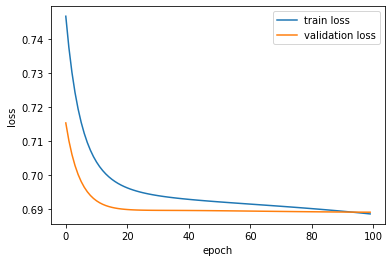

In [10]:
# plot training error and test error plots 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

In [11]:
print(f"Best Accuracy on training set = \
{max(history.history['accuracy'])*100:.3f}%")
print(f"Best Accuracy on validation set = \
{max(history.history['val_accuracy'])*100:.3f}%") 
test_loss, test_acc = \
classifier.evaluate(X_test, y_test['AdvancedFibrosis'])
print(f'The loss on the test set is {test_loss:.4f} and \
the accuracy is {test_acc*100:.3f}%')

Best Accuracy on training set = 55.567%
Best Accuracy on validation set = 56.757%
277/277 [==============================] - 0s 29us/step
The loss on the test set is 0.6861 and the accuracy is 50.903%
